In [119]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [13]:
df.iloc [:, 0:8].median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

<Axes: >

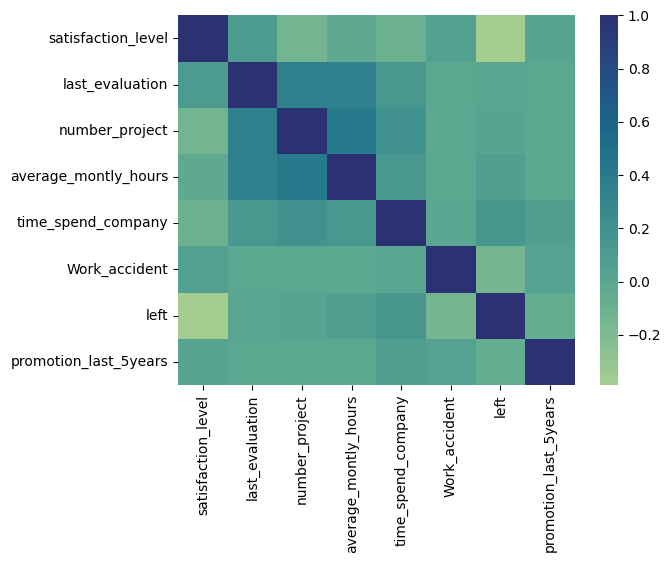

In [21]:
sns.heatmap(df.iloc [:, 0:8].corr(), cmap = 'crest')

Самые скоррелированные - ['number_project', 'average_montly_hours'], ['number_project', 'last_evaluation']
Менее скоррелированные - ['left', 'satisfaction_level'], ['left', 'Work_accident']

In [44]:
df['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [45]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [102]:
df.groupby('department')['salary'].value_counts()
                                                                        

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   medium     225
             high       225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: count, dtype: int64

In [ ]:
high_salary = df[df['salary'] == 'high']
low_salary = df[df['salary'] == 'low']

In [114]:
# проверка на нормальность 
print(st.shapiro(high_salary['average_montly_hours']))
print(st.shapiro(low_salary['average_montly_hours']))


ShapiroResult(statistic=0.9712138175964355, pvalue=5.604931784946058e-15)
ShapiroResult(statistic=0.9598619937896729, pvalue=7.01181725578852e-41)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [117]:
# используем непараметрический метод - тест Манна-Уитни
st.mannwhitneyu(high_salary['average_montly_hours'], low_salary['average_montly_hours'])

MannwhitneyuResult(statistic=4507096.5, pvalue=0.8241330720858693)

<function matplotlib.pyplot.show(close=None, block=None)>

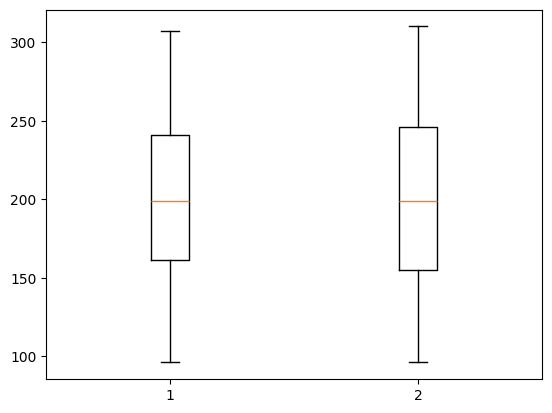

In [121]:
plt.boxplot([high_salary['average_montly_hours'], low_salary['average_montly_hours']])
plt.show

# Вывод - сотрудники с высоким окладом не проводят на работе больше времени, чем сотрудники с низким окладом

In [122]:
fired = df[df['left'] == 1]
non_fired = df[df['left'] == 0]

In [133]:
promotion_fired = fired['promotion_last_5years'].value_counts()
satisfaction_fired = fired['satisfaction_level'].mean()
project_fired = fired['number_project'].mean()
print(promotion_fired)
print(f'Средняя степень удовлетворенности: {satisfaction_fired}')
print(f'Среднее количество проектов: {project_fired}')


promotion_last_5years
0    3552
1      19
Name: count, dtype: int64
Средняя степень удовлетворенности: 0.4400980117614114
Среднее количество проектов: 3.8555026603192384


In [134]:
promotion_nfired = non_fired['promotion_last_5years'].value_counts()
satisfaction_nfired = non_fired['satisfaction_level'].mean()
project_nfired = non_fired['number_project'].mean()
print(promotion_nfired)
print(f'Средняя степень удовлетворенности: {satisfaction_nfired}')
print(f'Среднее количество проектов: {project_nfired}')

promotion_last_5years
0    11128
1      300
Name: count, dtype: int64
Средняя степень удовлетворенности: 0.666809590479524
Среднее количество проектов: 3.786664333216661


In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc [:, [0,1,2,3,4,5,7]], df['left'], random_state=42)

In [151]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [152]:
from sklearn.metrics import classification_report
y_pred = lda.predict(X_test)
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.79397   0.91307   0.84936      2853
           1    0.47122   0.24638   0.32357       897

    accuracy                        0.75360      3750
   macro avg    0.63259   0.57973   0.58647      3750
weighted avg    0.71676   0.75360   0.72359      3750

